# Geographic Information Extraction (GI)

In this notebook, we will extract geographic information from the Urban Econ dataset. We will use the following steps:

1. Import the necessary libraries
2. Load the dataset
3. Explore the dataset
4. Clean the dataset
5. Extract geographic information
6. Visualize the extracted geographic information
7. Calculate the data

## Ininitialization

In [1]:
import sys
import numpy as np
import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import glob, os
from tqdm import tqdm

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print(f"python version: {sys.version}")
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"rasterio version: {rasterio.__version__}")

python version: 3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.25.0
pandas version: 2.2.3
rasterio version: 1.4.3


## Read the dataset

Our dataset is globally NTL dataset with resolution of 500m x 500m. We will extract the GI values for each pixel in the dataset. Usually, a CBD is about 5km x 5km.

In [2]:
# walk through the directory to find all tif files
file_dir = r"E:\Dataset\NPP VIIR"
tif_files = []

for root, dirs, files in os.walk(file_dir):
    for file in files:
        if file.endswith(".tif"):
            tif_files.append(os.path.join(root, file))

for tif_file in tif_files:
    print(tif_file)

# read the target location dataset
target_path = r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Project\document\target_location_data.csv"
target_data = pd.read_csv(target_path)
print(f"============Target Data============")
print(target_data.columns)

E:\Dataset\NPP VIIR\2009\LongNTL_2009.tif
E:\Dataset\NPP VIIR\2010\LongNTL_2010.tif
E:\Dataset\NPP VIIR\2011\LongNTL_2011.tif
E:\Dataset\NPP VIIR\2012\LongNTL_2012.tif
E:\Dataset\NPP VIIR\2013_HasMask\LongNTL_2013.tif
E:\Dataset\NPP VIIR\2014_HasMask\LongNTL_2014.tif
E:\Dataset\NPP VIIR\2015_HasMask\LongNTL_2015.tif
E:\Dataset\NPP VIIR\2016_HasMask\LongNTL_2016.tif
E:\Dataset\NPP VIIR\2017_HasMask\LongNTL_2017.tif
E:\Dataset\NPP VIIR\2018_HasMask\LongNTL_2018.tif
E:\Dataset\NPP VIIR\2019_HasMask\LongNTL_2019.tif
============Target Data============
Index(['Opened', 'Store Name', 'City_x', 'Market', 'Brand', 'Store Number',
       'Ownership Type', 'Street Address', 'City_y', 'State/Province',
       'Country', 'Postcode', 'Phone Number', 'Timezone', 'Longitude',
       'Latitude'],
      dtype='object')


## Explanatory Analysis

c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in '110m_cultural.zip': 'ne_110m_admin_0_countries' (default), 'ne_110m_admin_0_countries_lakes', 'ne_110m_populated_places', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_0_boundary_lines_land', 'ne_110m_populated_places_simple', 'ne_110m_admin_0_pacific_groupings', 'ne_110m_admin_0_map_units', 'ne_110m_admin_1_states_provinces', 'ne_110m_admin_0_sovereignty', 'ne_110m_admin_1_states_provinces_scale_rank', 'ne_110m_admin_0_tiny_countries'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

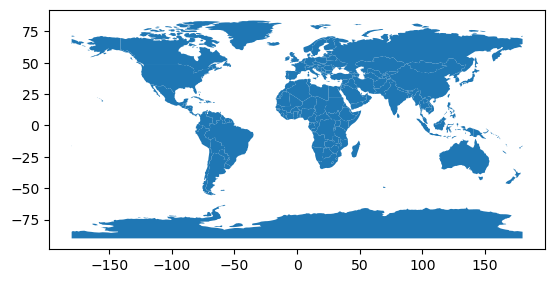

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 方法1：在线加载
# url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip"
url = r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Project\UE code\110m_cultural.zip"
countries = gpd.read_file(url)
countries.plot()

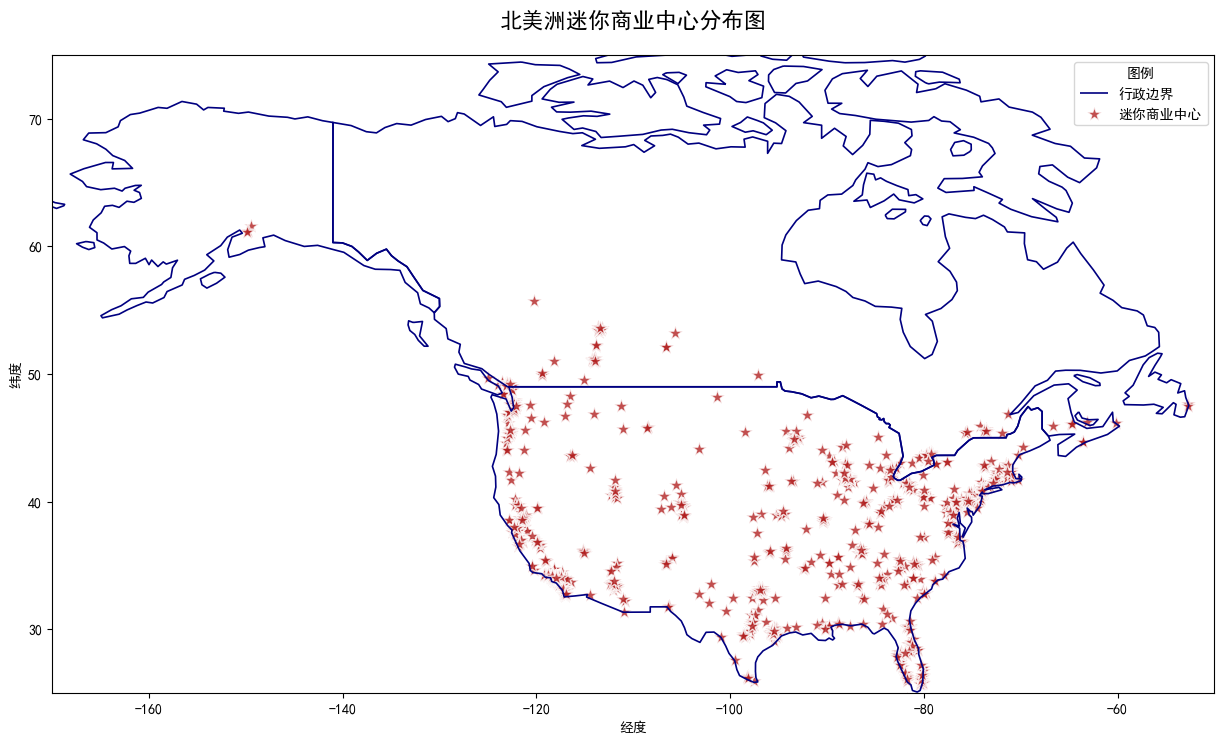

In [ ]:
url = r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Project\UE code\110m_cultural.zip"
countries = gpd.read_file(url)
countries.plot()
# 筛选美加（注意字段名称可能变化）
north_america = countries[countries['SOVEREIGNT'].isin(['United States of America', 'Canada'])]

# 创建基础画布
fig, ax = plt.subplots(figsize=(15, 10))

# 绘制行政边界，并指定图例标签
north_america.boundary.plot(ax=ax, linewidth=1.2, edgecolor='navy', label='行政边界')

# 转换目标数据（假设包含经度/纬度字段）
gdf = gpd.GeoDataFrame(
    target_data,
    geometry=gpd.points_from_xy(target_data.Longitude, target_data.Latitude),
    crs="EPSG:4326"  # 明确指定坐标系
)

# 绘制点标记，并指定图例标签
gdf.plot(ax=ax, color='firebrick', markersize=120, marker='*', edgecolor='w', alpha=0.8, label='迷你商业中心')

# 添加图例（自定义位置和标题）
ax.legend(title='图例', loc='upper right')

# 设置显示范围
ax.set_xlim([-170, -50])
ax.set_ylim([25, 75])
ax.set_xlabel("经度")
ax.set_ylabel("纬度")
plt.title("北美洲迷你商业中心分布图", fontsize=16, pad=20)

# 显示图表
plt.show()


c:\Users\Fisher Man\anaconda3\envs\py39\lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in '110m_cultural.zip': 'ne_110m_admin_0_countries' (default), 'ne_110m_admin_0_countries_lakes', 'ne_110m_populated_places', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_0_boundary_lines_land', 'ne_110m_populated_places_simple', 'ne_110m_admin_0_pacific_groupings', 'ne_110m_admin_0_map_units', 'ne_110m_admin_1_states_provinces', 'ne_110m_admin_0_sovereignty', 'ne_110m_admin_1_states_provinces_scale_rank', 'ne_110m_admin_0_tiny_countries'. Specify layer parameter to avoid this warning.
  result = read_func(


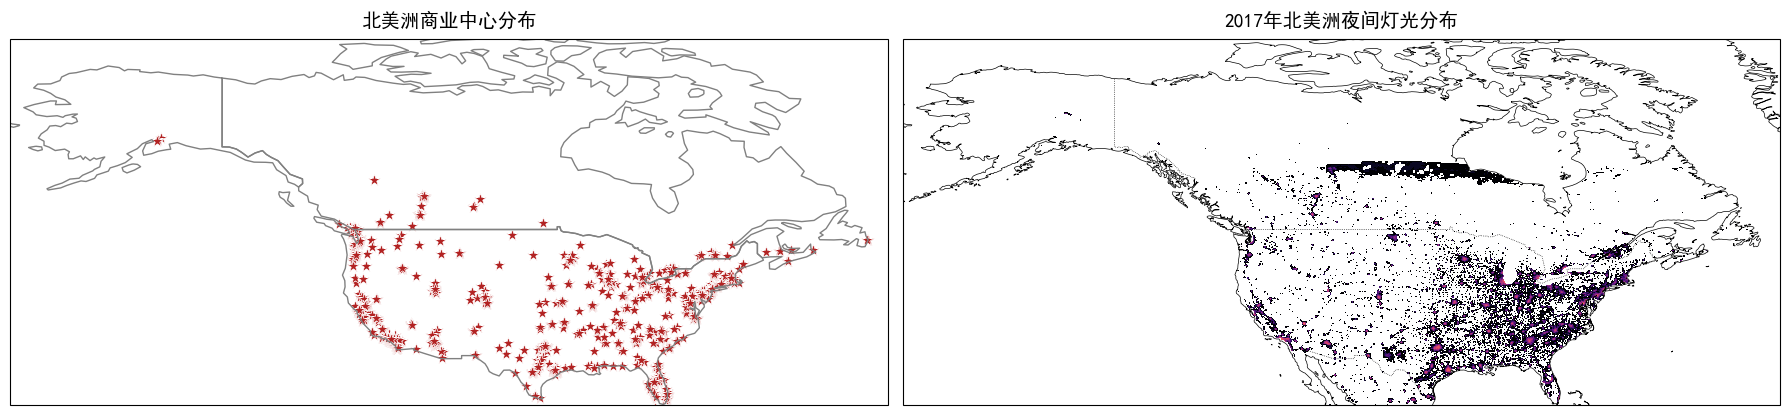

In [27]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm

# ——— 1. 读取并降采样夜间灯光 ——— #
tif_path = r"E:\Dataset\NPP VIIR\2017_HasMask\LongNTL_2017.tif"
with rasterio.open(tif_path) as src:
    scale     = 0.2
    out_shape = (
        1,
        int(src.height * scale),
        int(src.width  * scale)
    )
    lights = src.read(
        1,
        out_shape=out_shape,
        resampling=Resampling.bilinear
    )
    left, bottom, right, top = src.bounds

# 统一色标
vmin, vmax = 1, np.nanmax(lights)
norm = LogNorm(vmin=vmin, vmax=vmax)
cmap = 'magma'

# ——— 2. 读取并筛选北美行政边界 ——— #
url = r"C:\Users\Fisher Man\OneDrive\Desktop\Work Sheet\Py\Some Projects\Urban_Econ\Project\UE code\110m_cultural.zip"
countries = gpd.read_file(url)
north_america = countries[
    countries['SOVEREIGNT'].isin(['United States of America', 'Canada'])
]

# ——— 3. 读取商业中心点数据 ——— #
# target_data 需包含 'Longitude','Latitude' 两列
gdf = gpd.GeoDataFrame(
    target_data,
    geometry=gpd.points_from_xy(target_data.Longitude, target_data.Latitude),
    crs="EPSG:4326"
)

# ——— 4. 创建两个共享坐标、等比例子图 ——— #
fig, axes = plt.subplots(
    1, 2,
    figsize=(18, 8),
    sharex=True,
    sharey=True,
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# 左：商业中心分布（固定点大小）
ax0 = axes[0]
ax0.set_title("北美洲商业中心分布", fontsize=14, pad=10)
north_america.boundary.plot(ax=ax0, linewidth=1.0, edgecolor='gray')
ax0.scatter(
    gdf.Longitude, gdf.Latitude,
    s=80,                # 固定大小
    marker='*',
    color='firebrick',
    edgecolors='white', 
    lw=0.5,
    transform=ccrs.PlateCarree()
)
ax0.set_extent([-170, -50, 25, 75], crs=ccrs.PlateCarree())
ax0.set_aspect('equal', adjustable='box')
ax0.set_xlabel("经度")
ax0.set_ylabel("纬度")

# 右：夜间灯光强度图
ax1 = axes[1]
ax1.set_title("2017年北美洲夜间灯光分布", fontsize=14, pad=10)
im = ax1.imshow(
    lights, origin='upper',
    transform=ccrs.PlateCarree(),
    extent=[left, right, bottom, top],
    cmap=cmap, norm=norm
)
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':', linewidth=0.5)
ax1.set_extent([-170, -50, 25, 75], crs=ccrs.PlateCarree())
ax1.set_aspect('equal', adjustable='box')

# # ——— 5. 添加共用色条 ——— #
# cbar = fig.colorbar(
#     im, ax=axes.tolist(),
#     orientation='vertical',
#     fraction=0.05,
#     pad=0.04
# )
# cbar.set_label('夜间灯光强度（对数刻度）')

plt.tight_layout()
plt.show()


## Processing Func.

Main idea is :

Let's using X denotes each pixel's radiance value.

For city GDP growth:
$$ \text{Target GDP}_t = \sum_\text{pixels} X_i$$

For city land area expansion:
$$ \text{Target Land Area}_t = \text{count( X > threshold)}$$
where threshold is normally set to 1 nW/cm²·sr. Here we use half percentile value as threshold to offset the effect of urban sprawl.(Light pollution might affect our detection)

### Main Func.

target_data:
Index(['Opened', 'Store Name', 'City_x', 'Market', 'Brand', 'Store Number',
       'Ownership Type', 'Street Address', 'City_y', 'State/Province',
       'Country', 'Postcode', 'Phone Number', 'Timezone', 'Longitude',
       'Latitude'],
      dtype='object')

### Triangle Division

In [ ]:

# 1. 收集所有 TIFF 路径 & 对应年份
tif_files = glob.glob(r"E:\Dataset\NPP VIIR\*\LongNTL_*.tif")
print(f"Total {len(tif_files)} TIFF files found.")

# 建立 年份 → 文件 路径 映射
path_for_year = {
    int(os.path.basename(p).split('_')[-1].split('.')[0]): p
    for p in tif_files
}
tif_years = sorted(path_for_year.keys())

# 2. 预处理门店属性
target_data = target_data.copy()
target_data['Opened_Year'] = (
    pd.to_datetime(target_data['Opened'], errors='coerce')
      .dt.year
)
target_data.rename(
    columns={
        'Store Number': 'Store_Number',
        'State/Province': 'State_Province'
    },
    inplace=True
)
# 窗口参数
ws = 10 # first try
# ws = 5 # second try
# ws = 15 # third try
# ws = 1 # fourth try
# ws = 3 # fifth try


results = []

# 3. 对每个年份、每个门店都生成记录
for tif_year in tqdm(tif_years, desc="Years", unit="year"):
    with rasterio.open(path_for_year[tif_year]) as src:
        img = src.read(1)
        xres, yres = src.res

        for row in tqdm(
                target_data.itertuples(index=False),
                total=len(target_data),
                desc=f"Stores × {tif_year}",
                unit="store",
                leave=False):

            store_id     = str(row.Store_Number)
            province_id  = str(row.State_Province)
            lon, lat     = row.Longitude, row.Latitude
            country_id   = row.Country
            opened_year  = row.Opened_Year
            city = str(row.City_x)
            region = str(row.Timezone) #GMT-05:00 America/New_York

            
            try:
                row_idx, col_idx = src.index(lon, lat)
            except ValueError:
                # 坐标不在栅格内，跳过
                continue

            # Treat: 中央像元在开张前为0，开张及之后为1
            treat_central = int(opened_year <= tif_year)


            rs0, re0 = max(row_idx - ws, 0), min(row_idx + ws + 1, img.shape[0])
            cs0, ce0 = max(col_idx - ws, 0), min(col_idx + ws + 1, img.shape[1])
            central = img[rs0:re0, cs0:ce0]

            # 中央像元
            results.append({
                'Store_ID':     store_id,
                'Country_ID':   country_id,
                'Province_ID':  province_id,
                'City':         city,
                "Region":       region,
                'Opened_Year':  opened_year,
                'TIF_Year':     tif_year,
                'Longitude':    lon,
                'Latitude':     lat,
                'GDP_Estimate': float(central.sum(dtype=np.float64)),
                'City_Scale':   int((central > 10).sum()),
                'Treat':        treat_central,
                "central": 1
            })

            # 8 邻域 —— 始终视为对照组，Treat=0
            for i, (dr, dc) in enumerate(
                    [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)],
                    start=1):

                r1 = row_idx + dr
                c1 = col_idx + dc
                rs, re = max(r1 - ws, 0), min(r1 + ws + 1, img.shape[0])
                cs, ce = max(c1 - ws, 0), min(c1 + ws + 1, img.shape[1])
                win = img[rs:re, cs:ce]

                results.append({
                    'Store_ID':     f"{store_id}_{i}",
                    'Country_ID':   country_id,
                    'Province_ID':  province_id,
                    "City":         city ,
                    "Region":       region,
                    'Opened_Year':  opened_year,
                    'TIF_Year':     tif_year,
                    'Longitude':    lon + dc * xres,
                    'Latitude':     lat + dr * yres,
                    'GDP_Estimate': float(win.sum(dtype=np.float64)),
                    'City_Scale':   int((win > 10).sum()),
                    'Treat':        0,
                    "central": 0
                })

# 4. 汇总成 DataFrame
df_results = pd.DataFrame(results)
print(f"Final balanced panel shape: {df_results.shape}")
df_results.to_csv(f"balanced_panel_{ws}.csv", index=False, encoding='utf-8')
print(f"Saved to {'balanced_panel.csv'}")


Total 11 TIFF files found.


Years: 100%|██████████| 11/11 [05:55<00:00, 32.32s/year]


Final balanced panel shape: (135432, 13)
Saved to balanced_panel.csv


In [12]:
df_results.to_csv('GI_extract.csv',encoding='utf-8-sig',index=False)

### Circle Division

In [5]:
import glob, os
import numpy as np
import pandas as pd
import rasterio
from tqdm import tqdm

# 1. 收集所有 TIFF 路径 & 对应年份
tif_files = glob.glob(r"E:\Dataset\NPP VIIR\*\LongNTL_*.tif")
path_for_year = {
    int(os.path.basename(p).split('_')[-1].split('.')[0]): p
    for p in tif_files
}
tif_years = sorted(path_for_year.keys())

# 2. 预处理门店属性
target_data = target_data.copy()
target_data['Opened_Year'] = pd.to_datetime(
    target_data['Opened'], errors='coerce'
).dt.year
target_data.rename(
    columns={'Store Number':'Store_Number','State/Province':'State_Province'},
    inplace=True
)

# 窗口半径（以像元为单位）
ws = 10

# 构造圆形掩模：中心到像素距离 <= ws 的为 True
y, x = np.ogrid[-ws:ws+1, -ws:ws+1]
circle_mask = (x*x + y*y) <= ws*ws  # shape: (2*ws+1, 2*ws+1)

# 定义平移偏移：（dr, dc）单位是像元
# 0：中心；1-8：八方向邻域（N, NE, E, SE, S, SW, W, NW）
shifts = [
    ( 0,  0),                # 中心窗口 Treat=1
    (-1,  0), ( -1,  1),     # N, NE
    ( 0,  1), (  1,  1),     # E, SE
    ( 1,  0), (  1, -1),     # S, SW
    ( 0, -1), ( -1, -1),     # W, NW
]

results = []

# 3. 遍历年份与门店
for tif_year in tqdm(tif_years, desc="Years", unit="year"):
    with rasterio.open(path_for_year[tif_year]) as src:
        img = src.read(1)
        xres, yres = src.res  # 投影分辨率（经度/纬度单位）

        for row in tqdm(target_data.itertuples(index=False),
                        total=len(target_data),
                        desc=f"Stores × {tif_year}", leave=False):

            store_id    = str(row.Store_Number)
            province_id = str(row.State_Province)
            lon, lat    = row.Longitude, row.Latitude
            opened_year = row.Opened_Year

            try:
                center_r, center_c = src.index(lon, lat)
            except ValueError:
                # 坐标不在栅格范围内
                continue

            # 对每个方向（包括中心）进行统计
            for idx, (dr, dc) in enumerate(shifts):
                # 计算偏移后的中心像元坐标
                r0 = center_r + dr
                c0 = center_c + dc

                # 方形窗口边界
                rs = max(r0 - ws, 0)
                cs = max(c0 - ws, 0)
                re = min(r0 + ws + 1, img.shape[0])
                ce = min(c0 + ws + 1, img.shape[1])
                window = img[rs:re, cs:ce]

                # 对齐掩模子区域
                mh, mw = window.shape
                dr0 = ws - (r0 - rs)
                dc0 = ws - (c0 - cs)
                sub_mask = circle_mask[dr0:dr0+mh, dc0:dc0+mw]

                vals = window[sub_mask]
                if vals.size == 0:
                    # 掩模完全落在外部，跳过
                    continue

                # Treat 标记：只有中心窗口为 1，其余为 0
                treat_flag = 1 if idx == 0 else 0

                results.append({
                    'Store_ID':     store_id if idx == 0 else f"{store_id}_{idx}",
                    'Province_ID':  province_id,
                    'Opened_Year':  opened_year,
                    'TIF_Year':     tif_year,
                    'Longitude':    lon + dc * xres,
                    'Latitude':     lat + dr * yres,
                    'GDP_Estimate': float(vals.sum(dtype=np.float64)),
                    'City_Scale':   int((vals > 10).sum()),
                    'Treat':        treat_flag,
                    'central':      1 if idx == 0 else 0
                })

# 4. 汇总 & 保存
df_results = pd.DataFrame(results)
print(f"Final balanced panel shape: {df_results.shape}")
out_path = f"balanced_panel_circle_ws{ws}.csv"
df_results.to_csv(out_path, index=False, encoding='utf-8')
print(f"Saved to {out_path}")


Years: 100%|██████████| 11/11 [06:10<00:00, 33.65s/year]


Final balanced panel shape: (135432, 10)
Saved to balanced_panel_circle_ws10.csv


### Hex Division

In [8]:
import glob
import os
import numpy as np
import pandas as pd
import rasterio
from tqdm import tqdm

def hex_mask_and_shifts(ws):
    """
    构造正六边形掩模及中心和平移向量（中心 + 6 个方向）。
    ws: 六边形“半径”（顶点到中心的水平距离），以像元为单位
    返回:
      hex_mask: 布尔数组，shape=(2*ws+1,2*ws+1)
      shifts:   List of (dr,dc) 整数偏移：第一项 (0,0) 为中心，后面 6 项为六边形相邻中心
    """
    # 1. 构造掩模
    sqrt3 = np.sqrt(3)
    Ys, Xs = np.ogrid[-ws:ws+1, -ws:ws+1]
    hex_mask = (
        (np.abs(Xs) <= ws) &
        (np.abs(Ys) <= sqrt3/2 * ws) &
        ((sqrt3 * np.abs(Xs) + np.abs(Ys)) <= sqrt3 * ws)
    )

    # 2. 提取所有掩模内点相对坐标
    coords = np.argwhere(hex_mask)
    center = np.array([ws, ws])
    rels = coords - center  # (Npts,2)

    # 3. 计算每个 rel 的极角，用来挑 6 个方向
    angles = np.arctan2(rels[:,0], rels[:,1])  # arctan2(dr,dc)
    target_angles = np.deg2rad([0, 60, 120, 180, -120, -60])

    shifts = [(0, 0)]
    for ta in target_angles:
        idx = np.argmin(np.abs(np.arctan2(np.sin(angles - ta), np.cos(angles - ta))))
        dr, dc = rels[idx]
        shifts.append((int(dr), int(dc)))

    return hex_mask, shifts

# ================= main =================

# 1. 收集 TIFF 文件 & 年份映射
tif_files = glob.glob(r"E:\Dataset\NPP VIIR\*\LongNTL_*.tif")
path_for_year = {
    int(os.path.basename(p).split('_')[-1].split('.')[0]): p
    for p in tif_files
}
tif_years = sorted(path_for_year.keys())

# 2. 准备门店数据
target_data = target_data.copy()
target_data['Opened_Year'] = pd.to_datetime(
    target_data['Opened'], errors='coerce'
).dt.year
target_data.rename(
    columns={'Store Number':'Store_Number', 'State/Province':'State_Province'},
    inplace=True
)

# 3. 参数：六边形半径（像元）
ws = 10
hex_mask, shifts = hex_mask_and_shifts(ws)

results = []

# 4. 遍历年份与门店
for tif_year in tqdm(tif_years, desc="Years", unit="year"):
    with rasterio.open(path_for_year[tif_year]) as src:
        img = src.read(1)
        xres, yres = src.res

        for row in tqdm(target_data.itertuples(index=False),
                        total=len(target_data),
                        desc=f"Stores × {tif_year}", leave=False):

            store_id    = str(row.Store_Number)
            province_id = str(row.State_Province)
            lon, lat    = row.Longitude, row.Latitude
            opened_year = row.Opened_Year

            try:
                center_r, center_c = src.index(lon, lat)
            except ValueError:
                continue

            # 对中心及 6 个方向循环
            for idx, (dr, dc) in enumerate(shifts):
                r0 = center_r + dr
                c0 = center_c + dc

                # 截取与掩模同尺寸的窗口
                rs = max(r0 - ws, 0)
                cs = max(c0 - ws, 0)
                re = min(r0 + ws + 1, img.shape[0])
                ce = min(c0 + ws + 1, img.shape[1])
                window = img[rs:re, cs:ce]

                # 对齐掩模子区域
                mh, mw = window.shape
                dr0 = ws - (r0 - rs)
                dc0 = ws - (c0 - cs)
                sub_mask = hex_mask[dr0:dr0+mh, dc0:dc0+mw]

                vals = window[sub_mask]
                if vals.size == 0:
                    continue

                treat_flag = 1 if idx == 0 else 0

                results.append({
                    'Store_ID':     store_id if idx == 0 else f"{store_id}_{idx}",
                    'Province_ID':  province_id,
                    'Opened_Year':  opened_year,
                    'TIF_Year':     tif_year,
                    'Longitude':    lon + dc * xres,
                    'Latitude':     lat + dr * yres,
                    'GDP_Estimate': float(vals.sum(dtype=np.float64)),
                    'City_Scale':   int((vals > 10).sum()),
                    'Treat':        treat_flag,
                    'central':      treat_flag
                })

# 5. 汇总 & 保存
df_results = pd.DataFrame(results)
print(f"Final balanced panel shape: {df_results.shape}")
out_path = f"balanced_panel_hex_ws{ws}.csv"
df_results.to_csv(out_path, index=False, encoding='utf-8')
print(f"Saved to {out_path}")


Years: 100%|██████████| 11/11 [06:19<00:00, 34.46s/year]


Final balanced panel shape: (105336, 10)
Saved to balanced_panel_hex_ws10.csv


### Trial Func.

已保存大图到: E:\Dataset\NPP VIIR\Mosaic_Manhattan_4x3.tif


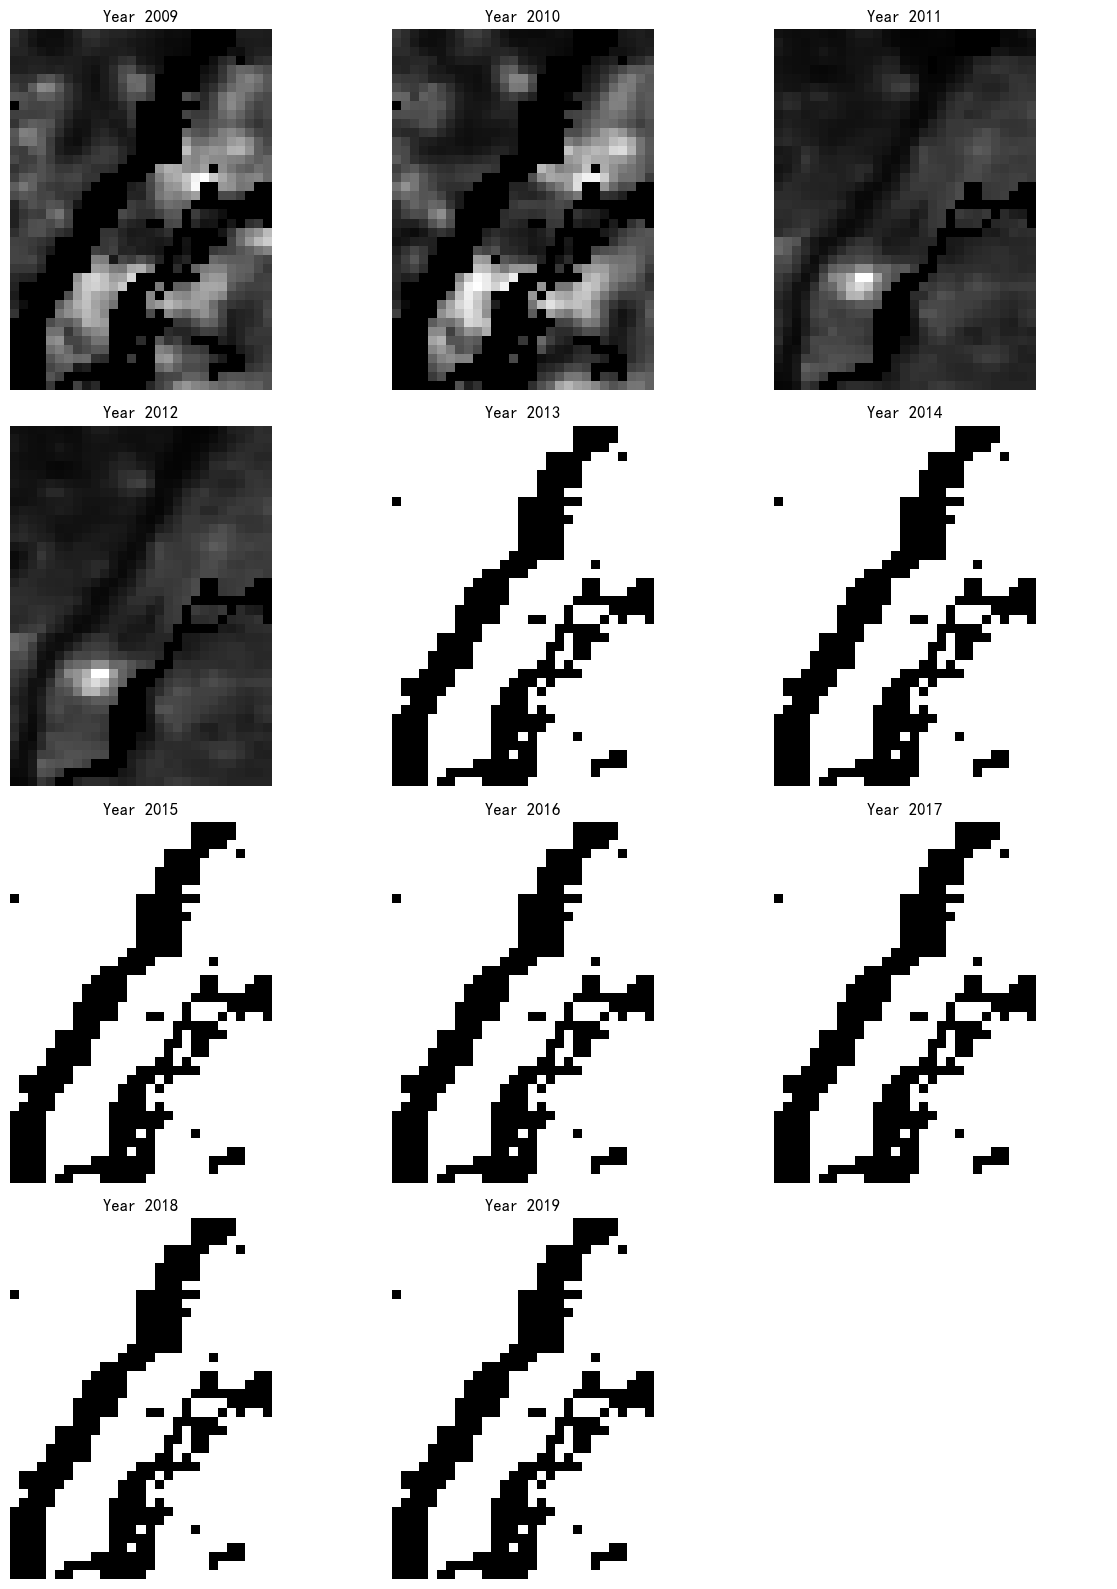

In [19]:
import glob
import os
import numpy as np
import rasterio
from rasterio.windows import from_bounds
from rasterio.transform import Affine
import matplotlib.pyplot as plt

# 1. 参数配置
tif_files = sorted(glob.glob(r"E:\Dataset\NPP VIIR\*\LongNTL_*.tif"))
assert len(tif_files) == 11, "需要正好 11 张 TIFF 文件"

# 曼哈顿经纬度范围
west, south, east, north = -74.03, 40.70, -73.90, 40.88

# 2. 裁剪并收集所有子图 (data, transform, crs)
clips = []
for path in tif_files:
    with rasterio.open(path) as src:
        # 裁剪窗口
        window = from_bounds(west, south, east, north, src.transform)
        window = window.round_offsets().round_lengths()
        data = src.read(1, window=window)
        transform = src.window_transform(window)
        clips.append((data, transform, src.crs))

# 3. 手动拼接为 4 行 × 3 列的 Mosaic
tile_h, tile_w = clips[0][0].shape
grid_rows, grid_cols = 4, 3    # 4 行 3 列
mosaic_h = tile_h * grid_rows
mosaic_w = tile_w * grid_cols
mosaic = np.zeros((mosaic_h, mosaic_w), dtype=clips[0][0].dtype)

for idx, (data, _, _) in enumerate(clips):
    row = idx // grid_cols
    col = idx %  grid_cols
    r0 = row * tile_h
    c0 = col * tile_w
    mosaic[r0:r0+tile_h, c0:c0+tile_w] = data

# 4. 构造正确的仿射变换
# 每个 tile 的左上角是 clips[0][1].c, clips[0][1].f
tile_transform = clips[0][1]
res_x = tile_transform.a
res_y = -tile_transform.e  # 注意 e 通常是负值
# 大图左上角坐标应该是第(0,0)块的左上角
origin_x = tile_transform.c
origin_y = tile_transform.f

new_transform = Affine(
    res_x, 0,      origin_x,
    0,   -res_y,   origin_y
)

# 5. 写出 GeoTIFF
out_meta = {
    'driver': 'GTiff',
    'height': mosaic_h,
    'width': mosaic_w,
    'count': 1,
    'dtype': mosaic.dtype,
    'crs': clips[0][2],
    'transform': new_transform
}
out_path = r"E:\Dataset\NPP VIIR\Mosaic_Manhattan_4x3.tif"
with rasterio.open(out_path, 'w', **out_meta) as dst:
    dst.write(mosaic, 1)
print(f"已保存大图到: {out_path}")

# 6. 可视化预览
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(12, 16))
for idx in range(grid_rows * grid_cols):
    ax = axes[idx // grid_cols, idx % grid_cols]
    if idx < len(clips):
        r0 = (idx // grid_cols) * tile_h
        c0 = (idx % grid_cols) * tile_w
        ax.imshow(mosaic[r0:r0+tile_h, c0:c0+tile_w], cmap='gray')
        year = os.path.basename(tif_files[idx])[-8:-4]
        ax.set_title(f"Year {year}")
    ax.axis('off')

plt.tight_layout()
plt.show()


## Preprocess Data for DID

In [2]:
from scipy.stats import mstats

# 读取CSV文件
df = pd.read_csv("GI_extract.csv")

# 温莎化处理，这里以处理第5百分位数和第95百分位数为例
df['GDP_Estimate_winsorized'] = mstats.winsorize(df['GDP_Estimate'], limits=[0.05, 0.05])
df['City_Scale_winsorized'] = mstats.winsorize(df['City_Scale'], limits=[0.05, 0.05])

# 查看处理后的数据框
df


,Store_ID,Country_ID,Province_ID,Opened_Year,TIF_Year,Longitude,Latitude,GDP_Estimate,City_Scale,Treat,GDP_Estimate_winsorized,City_Scale_winsorized
0,15407-156113,US,WA,2012.0,2012,-122.340000,47.620000,8.955274e+03,237,1,8.955274e+03,237
1,15407-156113_1,US,WA,NaN,2012,-122.344492,47.615508,8.312573e+03,223,0,8.312573e+03,223
2,15407-156113_2,US,WA,NaN,2012,-122.340000,47.615508,8.666610e+03,238,0,8.666610e+03,238
3,15407-156113_3,US,WA,NaN,2012,-122.335508,47.615508,8.730829e+03,243,0,8.730829e+03,243
4,15407-156113_4,US,WA,NaN,2012,-122.344492,47.620000,8.571578e+03,222,0,8.571578e+03,222
...,...,...,...,...,...,...,...,...,...,...,...,...
68890,7301-1001_4,US,MA,NaN,2019,-71.434492,42.360000,-6.805647e+38,17,0,-6.805647e+38,52
68891,7301-1001_5,US,MA,NaN,2019,-71.425508,42.360000,-1.020847e+39,19,0,-1.020847e+39,52
68892,7301-1001_6,US,MA,NaN,2019,-71.434492,42.364492,-6.805647e+38,20,0,-6.805647e+38,52
68893,7301-1001_7,US,MA,NaN,2019,-71.430000,42.364492,-6.805647e+38,23,0,-6.805647e+38,52


In [14]:
df = pd.read_csv("balanced_panel.csv")
df.head()

,Store_ID,Country_ID,Province_ID,Opened_Year,TIF_Year,Longitude,Latitude,GDP_Estimate,City_Scale,Treat
0,15407-156113,US,WA,2012,2009,-122.340000,47.620000,7079.639611,242,0
1,15407-156113_1,US,WA,2012,2009,-122.344492,47.615508,6737.176878,236,0
2,15407-156113_2,US,WA,2012,2009,-122.340000,47.615508,6986.298669,246,0
3,15407-156113_3,US,WA,2012,2009,-122.335508,47.615508,6946.693914,244,0
4,15407-156113_4,US,WA,2012,2009,-122.344492,47.620000,6800.097046,232,0


## Evaluation Criteria

Expansion speed metrics($M_i$):

$$ M_i = \frac{\triangledown U_i}{\triangledown T_i *ULA_i} *100\% \tag{1}$$

Expansion Strength metrics($L_i$):

$$ L_i = \frac{\triangledown U_i}{\triangledown T_i *TLA_i} *100\% \tag{2}$$

In eq.(1), $\triangledown U_i$ is the increase in urban area expansion, $\triangledown T_i$ is the time difference, and $ULA_i$ is the urban land area at the beginning of the expansion. In eq.(2), $TLA_i$ is the total land area at the end of the expansion.

In [21]:
import pandas as pd

# 读入平衡面板数据
df = pd.read_csv("balanced_panel.csv")

# 检查 Store_ID 是否包含下划线，并将对应的 Opened_Year 改为 2020
df.loc[df['Store_ID'].str.contains('_'), 'Opened_Year'] = 2020

# 筛选 2009 年作为基准
baseline = df[df["TIF_Year"] == 2009][["Store_ID", "GDP_Estimate", "City_Scale"]].copy()
baseline.columns = ["Store_ID", "GDP_2009", "Scale_2009"]

# 合并回原表
df = df.merge(baseline, on="Store_ID", how="left")

# 计算 ΔT
df["Delta_T"] = df["TIF_Year"] - 2009

# 避免除以零
df.loc[df["Delta_T"] == 0, "Delta_T"] = pd.NA

# 计算GDP增长率（按Mi公式）：ΔGDP / (ΔT * 基准GDP) * 100%
df["GDP_speed"] = (df["GDP_Estimate"] - df["GDP_2009"]) / (df["Delta_T"] * df["GDP_2009"]) * 100
# df["L_i"] = df["Delta_GDP"] / (df["Delta_T"] * df["City_Scale"]) * 100
df["GDP_strength"] = (df["GDP_Estimate"] - df["GDP_2009"]) /( df["GDP_Estimate"] * df["Delta_T"])* 100

# 计算City_Scale增长率（按Mi公式）：ΔScale / (ΔT * 基准Scale) * 100%
df["Scale_speed"] = (df["City_Scale"] - df["Scale_2009"]) / (df["Delta_T"] * df["Scale_2009"]) * 100
df["Scale_strength"] = (df["City_Scale"] - df["Scale_2009"]) / (df["City_Scale"] * df["Delta_T"]) * 100



import numpy as np
df["GDP_log"] = df["GDP_Estimate"].apply(lambda x: np.log(x + 1) if x > 0 else np.NAN)
df["Scale_log"] = df["City_Scale"].apply(lambda x: np.log(x + 1) if x > 0 else np.NAN)
# 对于这几个指标都取log
df['GDP_speed_log'] = df['GDP_speed'].apply(lambda x: np.log(x + 1) if x > 0 else np.NAN)
df['Scale_speed_log'] = df['Scale_speed'].apply(lambda x: np.log(x + 1) if x > 0 else np.NAN)
df['GDP_strength_log'] = df['GDP_strength'].apply(lambda x: np.log(x + 1) if x > 0 else np.NAN)
df['Scale_strength_log'] = df['Scale_strength'].apply(lambda x: np.log(x + 1) if x > 0 else np.NAN)

# 对基准期（ΔT原为0）的结果设为0或NaN
df[["GDP_speed", "Scale_speed", "GDP_strength", "Scale_strength","GDP_speed_log", "Scale_speed_log", "GDP_strength_log", "Scale_strength_log"]] = df[["GDP_speed", "Scale_speed", "GDP_strength", "Scale_strength","GDP_speed_log", "Scale_speed_log", "GDP_strength_log", "Scale_strength_log"]].fillna(0)

df.drop(columns=["GDP_2009", "Scale_2009", "Delta_T"], inplace=True)
df.to_csv("GI_extract_panel.csv", index=False)
